In [1]:
from cuber import *
import matplotlib.pyplot as plt
%matplotlib notebook

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig_width_pt = 240.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches

In [238]:
import matplotlib.patches as mpatches

In [32]:
moffat = cuber(file='../2I_DATACUBE_FINAL_2020-03-19T05:46:49.016.fits',run=True,numcores=7,spec_catalog='ck',psf_profile='moffat',plot=False,psf_preference='model',calc_psf_only=True)
gaussian = cuber(file='../2I_DATACUBE_FINAL_2020-03-19T05:46:49.016.fits',run=True,numcores=7,spec_catalog='ck',psf_profile='gaussian',plot=False,psf_preference='model',calc_psf_only=True)
data = cuber(file='../2I_DATACUBE_FINAL_2020-03-19T05:46:49.016.fits',run=True,numcores=7,spec_catalog='ck',psf_profile='gaussian',plot=False,calc_psf_only=True)



Number of sources brighter than 25: 136
wcs shift:  [ 2.58933013e+01 -3.35646237e+00  2.63083561e-03]
Coords transformed
reshifting coords
shift:  [-1.0061947  -0.11968209  0.        ]
estimate shape  (290, 230)
Done:  72
Rerunning cal with psf sources
reshifting coords
shift:  [ 0.03427194 -0.05503264  0.        ]
estimate shape  (290, 230)
Done:  72
Made PSF
Exiting
Number of sources brighter than 25: 136
wcs shift:  [ 2.58933013e+01 -3.35646237e+00  2.63083561e-03]
Coords transformed
reshifting coords
shift:  [-1.0061947  -0.11968209  0.        ]
estimate shape  (290, 230)
Done:  72
Rerunning cal with psf sources
reshifting coords
shift:  [ 0.06015122 -0.08459176  0.        ]
estimate shape  (290, 230)
Done:  72
Made PSF
Exiting
Number of sources brighter than 25: 136
wcs shift:  [ 2.58933013e+01 -3.35646237e+00  2.63083561e-03]
Coords transformed
reshifting coords
shift:  [-1.0061947  -0.11968209  0.        ]
estimate shape  (290, 230)
!!! Large difference of 0.31 between model_psf

In [49]:
i = 2
data.psf.fit_pos(data.cal_cuts[i])
data_f,data_r = data.psf.psf_flux(data.cal_cuts[i])

gaussian.psf.fit_pos(data.cal_cuts[i])
gauss_f, gauss_r = gaussian.psf.psf_flux(data.cal_cuts[i])


moffat.psf.fit_pos(data.cal_cuts[i])
moffat_f, moffat_r = moffat.psf.psf_flux(data.cal_cuts[i])


j = 5
data.psf.fit_pos(data.cal_cuts[j])
data_f2,data_r2 = data.psf.psf_flux(data.cal_cuts[j])

gaussian.psf.fit_pos(data.cal_cuts[j])
gauss_f2, gauss_r2 = gaussian.psf.psf_flux(data.cal_cuts[j])


moffat.psf.fit_pos(data.cal_cuts[j])
moffat_f2, moffat_r2 = moffat.psf.psf_flux(data.cal_cuts[j])

In [298]:
data.cals.id.iloc[i]

5856950561179337216

In [295]:
len(data.cal_cuts)

14

In [60]:
from mpl_toolkits.axes_grid1 import make_axes_locatable


<IPython.core.display.Javascript object>


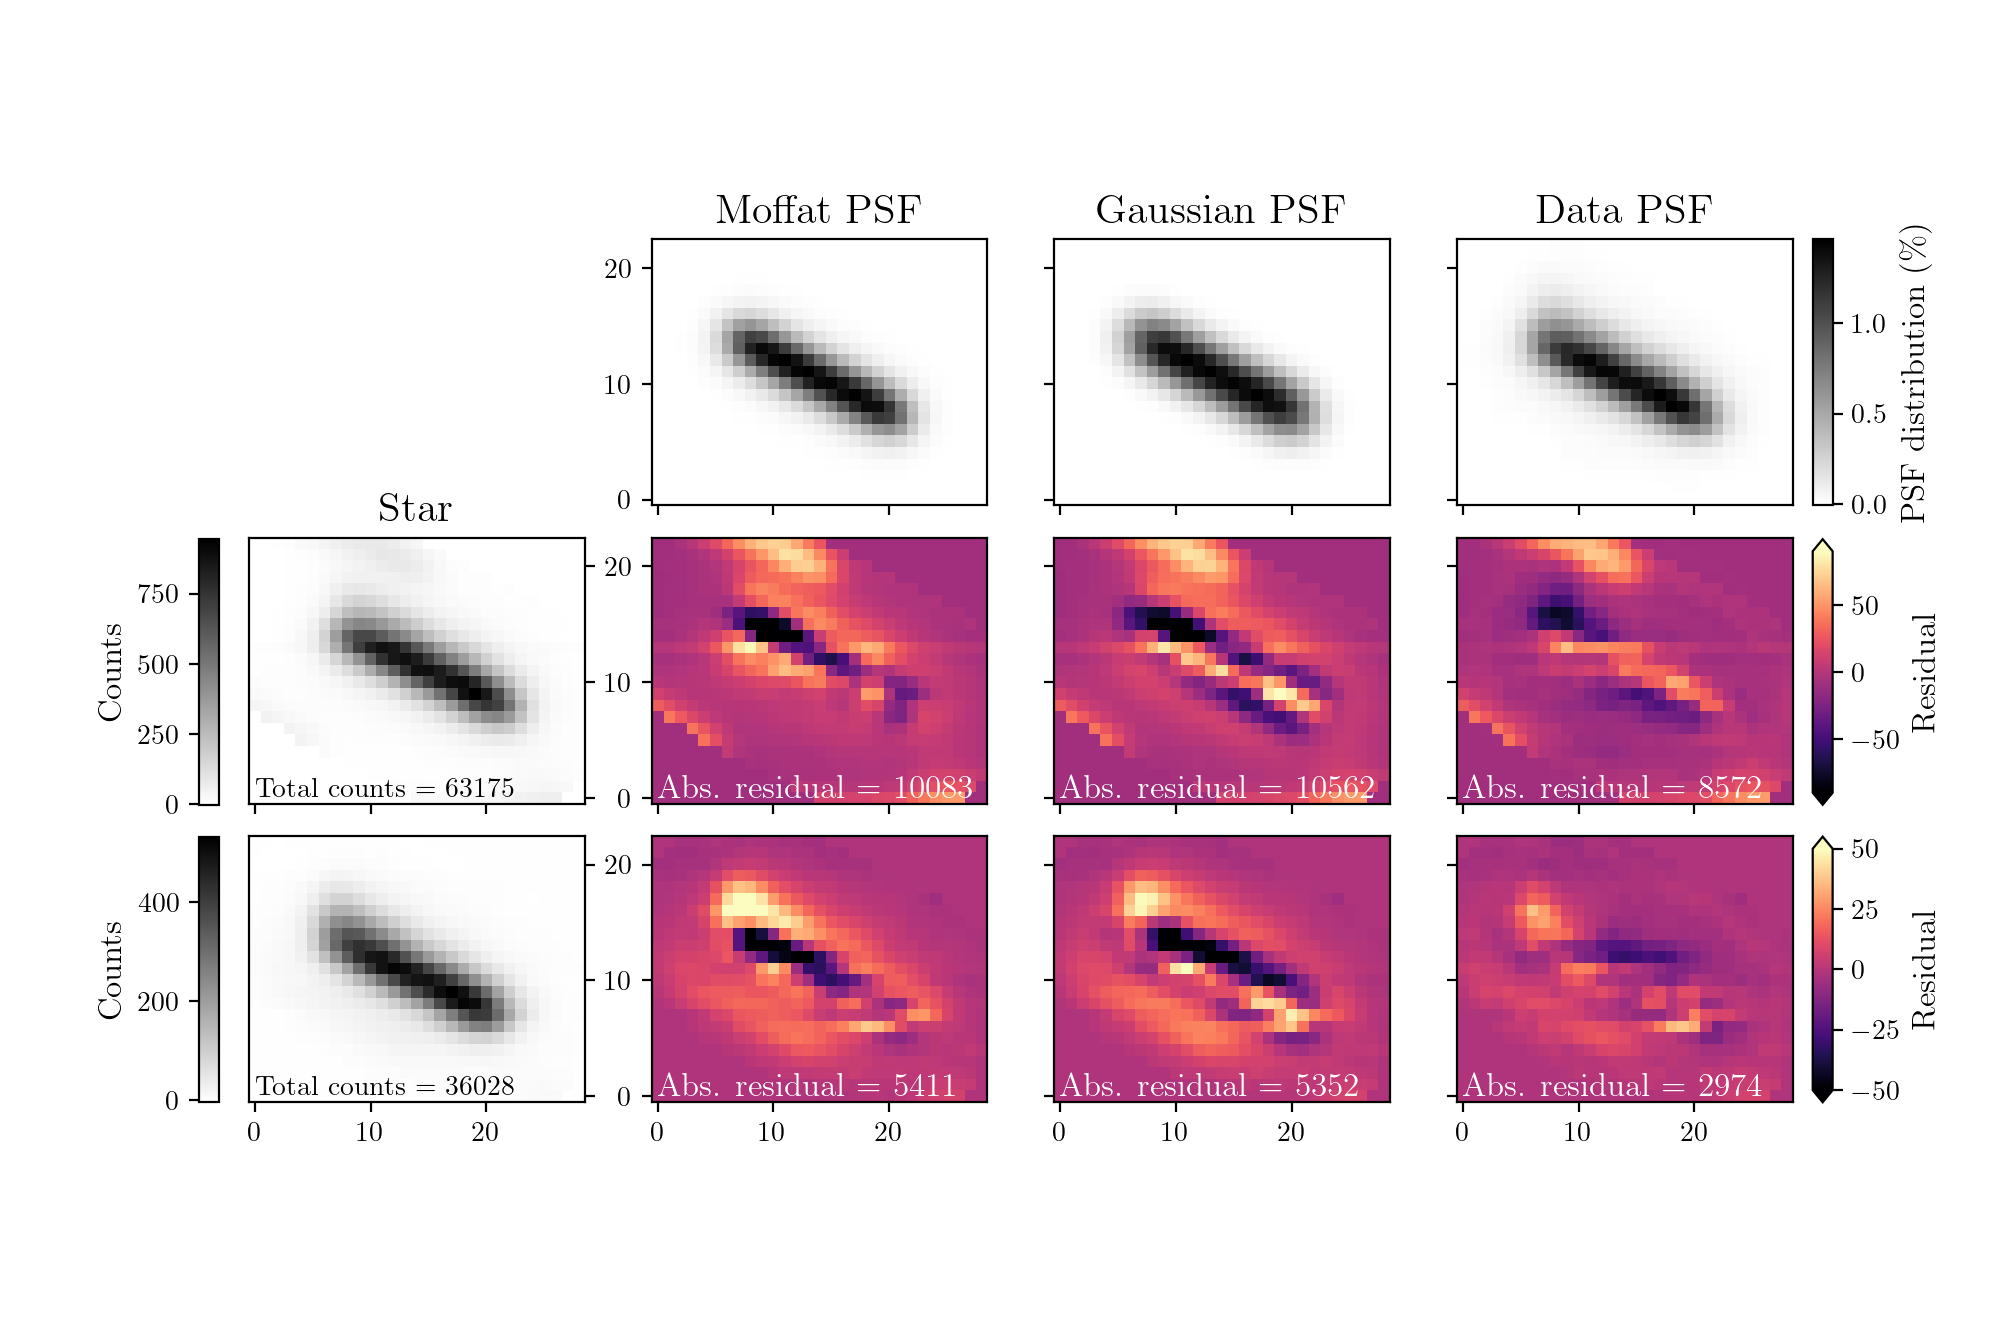

In [302]:
fig, axs = plt.subplot_mosaic('''
                               ABCD
                               EFGH
                               IJKL
                               ''',
                              figsize=(1.5*fig_width*2,2*fig_width))
#plt.tight_layout()
axs['A'].axis('off')

axs['B'].set_title('Moffat PSF',fontsize=15)
axs['B'].imshow(moffat.psf.longpsf.T,origin='lower',cmap='gray_r')

axs['C'].set_title('Gaussian PSF',fontsize=15)
axs['C'].imshow(gaussian.psf.longpsf.T,origin='lower',cmap='gray_r')

axs['D'].set_title('Data PSF',fontsize=15)
datpsf = axs['D'].imshow(data.psf.longpsf.T*100,origin='lower',cmap='gray_r')


axs['E'].set_title('Star',fontsize=15)
star1 = axs['E'].imshow(data.cal_cuts[i].T,origin='lower',cmap='gray_r')
axs['E'].text(0,0,s=r'Total counts $=$ '+str(int(np.nansum(data.cal_cuts[i]))))
#axs['E'].text(0,19,s=r'Gaia '+str(data.cals.id.iloc[i]),fontsize=10)

#fig.colorbar(star1,ax=axs['E'])
#divider = make_axes_locatable(axs['E'])
#cax = divider.append_axes('right', size='5%', pad=0.05,)
#fig.colorbar(star1, cax=cax, orientation='vertical',);
cb_ax = fig.add_axes([.1,.124+0.27,.01,.2])
col = plt.colorbar(star1,orientation='vertical',cax=cb_ax)
col.ax.set_ylabel('Counts',fontsize=12)
col.ax.yaxis.set_label_position("left")
col.ax.yaxis.set_ticks_position('left')


s1max = 90#np.nanpercentile(moffat_r,99)
s1min = -90#np.nanpercentile(moffat_r,16)

axs['F'].imshow(moffat_r.T,origin='lower',vmin=s1min,vmax=s1max,cmap='magma')
axs['F'].text(0,0,s=r'Abs. residual $=$ '+str(int(np.nansum(abs(moffat_r)))),color='white',weight=1000,fontsize=12)

axs['G'].imshow(gauss_r.T,origin='lower',vmin=s1min,vmax=s1max,cmap='magma')
axs['G'].text(0,0,s=r'Abs. residual $=$ '+str(int(np.nansum(abs(gauss_r)))),color='white',weight=1000,fontsize=12)

data1 = axs['H'].imshow(data_r.T,origin='lower',vmin=s1min,vmax=s1max,cmap='magma')
axs['H'].text(0,0,s=r'Abs. residual $=$ '+str(int(np.nansum(abs(data_r)))),color='white',weight=1000,fontsize=12)
#divider = make_axes_locatable(axs['H'])
#cax = divider.append_axes('right', size='5%', pad=0.05)
#fig.colorbar(data1, cax=cax, orientation='vertical',extend='both');
cb_ax = fig.add_axes([.91,.124+.27,.01,.2])
col = fig.colorbar(data1,orientation='vertical',cax=cb_ax,extend='both')
col.ax.set_ylabel('Residual',fontsize=12)

star2 = axs['I'].imshow(data.cal_cuts[j].T,origin='lower',cmap='gray_r')
axs['I'].text(0,0,s=r'Total counts $=$ '+str(int(np.nansum(data.cal_cuts[j]))))
#divider = make_axes_locatable(axs['I'])
#cax = divider.append_axes('right', size='5%', pad=0.05)
#fig.colorbar(star2, cax=cax, orientation='vertical');
cb_ax = fig.add_axes([.1,.17,.01,.2])
col = plt.colorbar(star2,orientation='vertical',cax=cb_ax,)
col.ax.set_ylabel('Counts',fontsize=12)
col.ax.yaxis.set_label_position("left")
col.ax.yaxis.set_ticks_position('left')

#col.ax.tick_params(left=True,labelleft=True,right=False,labelright=False,)

s2max = 50#np.nanpercentile(moffat_r,99)
s2min = -50#np.nanpercentile(moffat_r,16)

axs['J'].imshow(moffat_r2.T,origin='lower',vmin=s2min,vmax=s2max,cmap='magma')
axs['J'].text(0,0,s=r'Abs. residual $=$ '+str(int(np.nansum(abs(moffat_r2)))),color='white',weight=1000,fontsize=12)

axs['K'].imshow(gauss_r2.T,origin='lower',vmin=s2min,vmax=s2max,cmap='magma')
axs['K'].text(0,0,s=r'Abs. residual $=$ '+str(int(np.nansum(abs(gauss_r2)))),color='white',weight=1000,fontsize=12)

data2 = axs['L'].imshow(data_r2.T,origin='lower',vmin=s2min,vmax=s2max,cmap='magma')
axs['L'].text(0,0,s=r'Abs. residual $=$ '+str(int(np.nansum(abs(data_r2)))),color='white',weight=1000,fontsize=12)
#divider = make_axes_locatable(axs['L'])
#cax = divider.append_axes('right', size='5%', pad=0.05)
#cb_ax = fig.add_axes([.91,.124,.04,.754])
cb_ax = fig.add_axes([.91,.17,.01,.2])
col = plt.colorbar(data2,orientation='vertical',cax=cb_ax,extend='both')
col.ax.set_ylabel('Residual',fontsize=12)

axs['K'].set_yticklabels([])

axs['L'].set_yticklabels([])
#axs['J'].set_yticklabels([])

axs['C'].set_yticklabels([])
axs['D'].set_yticklabels([])
axs['E'].set_yticklabels([])
#axs['F'].set_yticklabels([])
axs['G'].set_yticklabels([])
axs['H'].set_yticklabels([])
axs['I'].set_yticklabels([])


axs['B'].set_xticklabels([])
axs['C'].set_xticklabels([])
axs['D'].set_xticklabels([])
axs['E'].set_xticklabels([])
axs['F'].set_xticklabels([])
axs['G'].set_xticklabels([])
axs['H'].set_xticklabels([])


axs['E'].tick_params(left = False,right=True)
axs['I'].tick_params(left = False,right=True)

#axs['K'].set_xlabel(r'$x$ position (Pixel)',fontsize=15)


cb_ax = fig.add_axes([.91,.62,.01,.2])
col = plt.colorbar(datpsf,orientation='vertical',cax=cb_ax)
col.ax.set_ylabel('PSF distribution (\%)',fontsize=12)


rect=mpatches.Rectangle((0,0),100,100, 
                        fill=False,
                        color="Orange",
                       linewidth=2,
                       facecolor="red")
#axs['J'].add_patch(rect)

#ax3 = fig.add_subplot(111, facecolor="none")
#ax3.axis('off')
#ax3.
#fig.colorbar(data2, cax=cax, orientation='vertical',extend='both',);
plt.subplots_adjust(hspace=-0.3)
plt.subplots_adjust(wspace=0.2)


plt.savefig('PSF_example_residual.pdf',bbox_inches='tight')

In [210]:
np.nansum(abs(moffat_r2))

5411.008769212638

In [207]:
np.nansum(abs(data_r2))

2974.3945

<IPython.core.display.Javascript object>


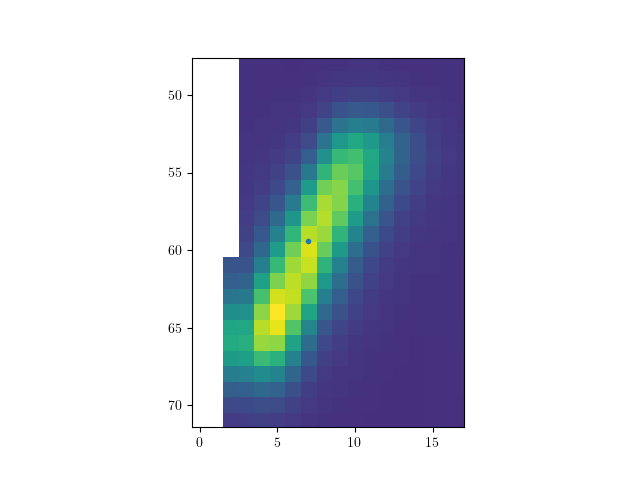

In [107]:
plt.figure()
plt.imshow(data.image)
plt.plot(data.cat.x.values[0],data.cat.y.values[0],'.')

In [70]:
np.nanpercentile(moffat_r,16)

-8.466523637096826

In [30]:
data.psf.fit_pos(data.cal_cuts[2])
data_f,data_r = data.psf.psf_flux(data.cal_cuts[2])

gaussian.psf.fit_pos(data.cal_cuts[2])
gauss_f, gauss_r = gaussian.psf.psf_flux(data.cal_cuts[2])


moffat.psf.fit_pos(data.cal_cuts[2])
moffat_f, moffat_r = moffat.psf.psf_flux(data.cal_cuts[2])